# Most Followed Profile on Instagram

## Done by: Yann

### Source: https://data.world/socialmediadata/most-followed-on-instagram

### Summary:
##### • BRAND
##### • CATEGORIES 1
##### • CATEGORIES 2
##### • FOLLOWERS
##### • ER - Average engagement rate of all media. Engagement rate is based on the likes and comments received divided by the number of followers at the time of the post.
##### • POSTS ON HASHTAG
##### • MEDIA POSTED

##

## Import Data and Libraries

In [119]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [120]:
data_import = pd.read_csv(r"C:\Users\Rachel Kuek\OneDrive\Desktop\Most Followed IG\Main.csv")
data_import

RANK                   BRAND CATEGORIES 1 CATEGORIES 2 FOLLOWERS  \
0      1            Selena Gomez  celebrities    musicians    105.4M   
1      2            Taylor Swift  celebrities    musicians     95.2M   
2      3           Ariana Grande  celebrities    musicians     92.3M   
3      4                 Beyonce  celebrities    musicians     90.6M   
4      5     Kim Kardashian West  celebrities           tv     89.3M   
..   ...                     ...          ...          ...       ...   
95    96  DanialvesD2 My Twitter  celebrities     athletes     11.7M   
96    97         Dolce & Gabbana      fashion       luxury     11.7M   
97    98           Tyga / T-Raww  celebrities    musicians     11.6M   
98    99       Paul Labile Pogba  celebrities     athletes     11.5M   
99   100            Barack Obama  celebrities    political     11.5M   

              ER iPOSTS ON HASHTAG  MEDIA POSTED  
0   2.62% (1342)       14.5M  (48)  1.2k  (2135)  
1   1.96% (2040)       10.5M  (66)   958  (2669)  
2   1.43% (2759)       16.9M  (41)   2.8k  (824)  
3   2.53% (1427)        9.2M  (70)  1.4k  (1897)  
4   1.39% (2812)       5.1M  (130)   3.6k  (550)  
..           ...               ...           ...  
95  1.62% (2477)    122.4k  (1486)  1.7k  (1508)  
96  0.48% (4142)       6.1M  (105)   3.9k  (471)  
97  1.31% (2922)       1.2M  (421)   2.5k  (948)  
98   6.11% (170)     77.6k  (1745)   396  (4219)  
99   3.37% (826)       2.5M  (240)   231  (4753)  

[100 rows x 8 columns]

#

## EDA

In [121]:
# Check for dimension of data

data_import.shape

(100, 8)

In [122]:
# Check for the type of data

data_import.dtypes

RANK                  int64
BRAND                object
CATEGORIES 1         object
CATEGORIES 2         object
FOLLOWERS            object
ER                   object
iPOSTS ON HASHTAG    object
MEDIA POSTED         object
dtype: object

In [123]:
# Check for any empty cells

data_import.isna().sum()

RANK                 0
BRAND                0
CATEGORIES 1         0
CATEGORIES 2         9
FOLLOWERS            0
ER                   0
iPOSTS ON HASHTAG    0
MEDIA POSTED         0
dtype: int64

##### Filter out those 9 NaN rows 

In [124]:
# Filter the DataFrame for rows where 'CATEGORIES 2' is empty
empty_categories_2 = data_import[data_import['CATEGORIES 2'].isnull()]

# Get the values of 'CATEGORIES 1' column for the filtered rows
categories_1_empty_categories_2 = empty_categories_2['CATEGORIES 1']

# Print the empty rows of 'CATEGORIES 2' with corresponding 'CATEGORIES 1' values
for index, value in categories_1_empty_categories_2.items():
    print(f"CATEGORIES 1: {value:<20} | CATEGORIES 2: (Empty)")
    
#The < character in the format specifier {value:<20} ensures that the 'CATEGORIES 1' value 
#is left-aligned within a field of width 20. Adjust the width as per your preference.


sum_of_empty_cat_2 = categories_1_empty_categories_2.value_counts().sum()
print("Total number of empty Category 2 rows is: ", sum_of_empty_cat_2)     # Double check with above.


CATEGORIES 1: media                | CATEGORIES 2: (Empty)
CATEGORIES 1: fashion              | CATEGORIES 2: (Empty)
CATEGORIES 1: entertainment        | CATEGORIES 2: (Empty)
CATEGORIES 1: other                | CATEGORIES 2: (Empty)
CATEGORIES 1: media                | CATEGORIES 2: (Empty)
CATEGORIES 1: media                | CATEGORIES 2: (Empty)
CATEGORIES 1: beverages            | CATEGORIES 2: (Empty)
CATEGORIES 1: beauty               | CATEGORIES 2: (Empty)
CATEGORIES 1: fashion              | CATEGORIES 2: (Empty)
Total number of empty Category 2 rows is:  9


##### Next, we compare the categories (1 and 2) to see whether we should remove the entire row or fillna

In [125]:
# Get the unique values of 'CATEGORIES 2' column
categories_2 = data_import['CATEGORIES 2'].unique()

# Get the unique values of 'CATEGORIES 1' column
categories_1 = data_import['CATEGORIES 1'].unique()

# Display the unique values
print("Unique values in CATEGORIES 2:", categories_2)
print("-"*50)
print("Unique values in CATEGORIES 1:", categories_1)

Unique values in CATEGORIES 2: ['musicians' 'tv' 'athletes' 'models' 'sport' nan 'actors' 'football'
 'basketball' 'retail' 'luxury' 'media' 'entrepreneurs' 'fashion'
 'political']
--------------------------------------------------
Unique values in CATEGORIES 1: ['celebrities' 'fashion' 'media' 'sport' 'entertainment' 'other' 'beauty'
 'beverages']


##### I don't wish to remove the rows with empty Category 2 as it will ruin the data structure
##### My approach after analysing is, for those empty cat 2 rows, copy the information from Cat 1 to Cat 2. Since both the categories seems similar

In [126]:
# We can use the fillna function

data_import['CATEGORIES 2'] = data_import['CATEGORIES 2'].fillna(data_import['CATEGORIES 1'])

In [127]:
# Now to check the updated table

# Check if 'CATEGORIES 2' matches 'CATEGORIES 1'
matching_categories = data_import['CATEGORIES 2'] == data_import['CATEGORIES 1']

# Filter the DataFrame for rows where 'CATEGORIES 2' matches 'CATEGORIES 1'
matching_rows = data_import[matching_categories]

# Print the matching rows for 'CATEGORIES 1' and 'CATEGORIES 2'
print(matching_rows[['CATEGORIES 1', 'CATEGORIES 2']])

     CATEGORIES 1   CATEGORIES 2
12          media          media
21        fashion        fashion
30  entertainment  entertainment
50          other          other
71          media          media
75          media          media
86      beverages      beverages
87         beauty         beauty
91        fashion        fashion


##### Nice. Now those empty categories 2 rows are updated

In [160]:
# We need to double check if there are still any na values
data_import.isna().sum()

RANK                 0
BRAND                0
CATEGORIES 1         0
CATEGORIES 2         0
FOLLOWERS            0
ER                   0
iPOSTS ON HASHTAG    0
MEDIA POSTED         0
dtype: int64

#

##### Let's continue 

In [129]:
# Convert 'FOLLOWERS' to int

# Remove the 'M' character from the values and multiply by 1 million
data_import['FOLLOWERS'] = pd.to_numeric(data_import['FOLLOWERS'].str.replace('M', '', regex=False)) * 1000000

# Convert the 'Followers' column to integer
data_import['FOLLOWERS'] = data_import['FOLLOWERS'].astype(int)

In [130]:
# Check for the data types again

data_import.dtypes

RANK                  int64
BRAND                object
CATEGORIES 1         object
CATEGORIES 2         object
FOLLOWERS             int32
ER                   object
iPOSTS ON HASHTAG    object
MEDIA POSTED         object
dtype: object

In [131]:
# Check the dataset for the updated numeric column of 'FOLLOWERS'
data_import.head()

RANK                BRAND CATEGORIES 1 CATEGORIES 2  FOLLOWERS  \
0     1         Selena Gomez  celebrities    musicians  105400000   
1     2         Taylor Swift  celebrities    musicians   95200000   
2     3        Ariana Grande  celebrities    musicians   92300000   
3     4              Beyonce  celebrities    musicians   90600000   
4     5  Kim Kardashian West  celebrities           tv   89300000   

             ER iPOSTS ON HASHTAG  MEDIA POSTED  
0  2.62% (1342)       14.5M  (48)  1.2k  (2135)  
1  1.96% (2040)       10.5M  (66)   958  (2669)  
2  1.43% (2759)       16.9M  (41)   2.8k  (824)  
3  2.53% (1427)        9.2M  (70)  1.4k  (1897)  
4  1.39% (2812)       5.1M  (130)   3.6k  (550)

##

## Statistics Summary of followers

In [132]:
data_import['FOLLOWERS'].describe()

count    1.000000e+02
mean     3.104700e+07
std      2.428683e+07
min      1.150000e+07
25%      1.392500e+07
50%      1.825000e+07
75%      4.217500e+07
max      1.054000e+08
Name: FOLLOWERS, dtype: float64

In [133]:
# Check the summary against the min and max value of FOLLOWERS

data_import.tail()

RANK                   BRAND CATEGORIES 1 CATEGORIES 2  FOLLOWERS  \
95    96  DanialvesD2 My Twitter  celebrities     athletes   11700000   
96    97         Dolce & Gabbana      fashion       luxury   11700000   
97    98           Tyga / T-Raww  celebrities    musicians   11600000   
98    99       Paul Labile Pogba  celebrities     athletes   11500000   
99   100            Barack Obama  celebrities    political   11500000   

              ER iPOSTS ON HASHTAG  MEDIA POSTED  
95  1.62% (2477)    122.4k  (1486)  1.7k  (1508)  
96  0.48% (4142)       6.1M  (105)   3.9k  (471)  
97  1.31% (2922)       1.2M  (421)   2.5k  (948)  
98   6.11% (170)     77.6k  (1745)   396  (4219)  
99   3.37% (826)       2.5M  (240)   231  (4753)

##

## Data Analysis

<AxesSubplot:>

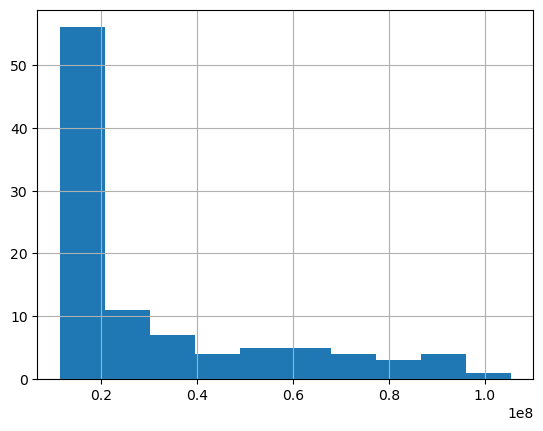

In [134]:
# Create Histogram for Followers
data_import['FOLLOWERS'].hist()     # MatplotLib Version

##### As you can tell, the MatplotLib Histogram is not very informative. So my next approach is to use the Plotly version

In [135]:
# Plotly Version (Interactive)
fig = px.histogram(data_import, x='FOLLOWERS')

# Give the bars a black outline each
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.show()

##### Most of the Top 100 Instagram profile has a range of 10M - 19.9M followers

#

### Number of media posts

<AxesSubplot:>

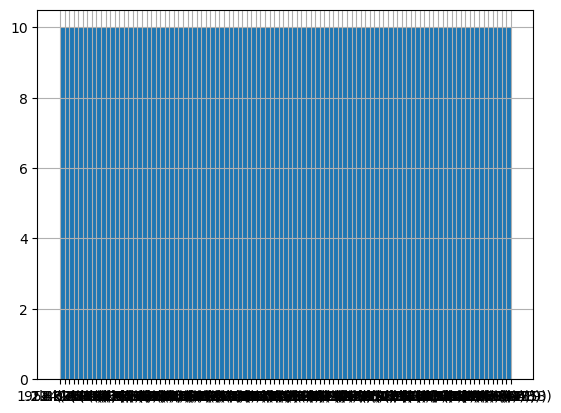

In [136]:
data_import['MEDIA POSTED'].hist()  # MatplotLib Version

##### Huge mess. Lets try the Plotly Version

In [137]:
# Plotly Version (Interactive)
fig = px.histogram(data_import, x='MEDIA POSTED')

# Give the bars a black outline each
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.show()

##### Another mess. It's because of the different numbering in the brackets and maybe of the "k". 
##### Lets try to remove the bracket values and change all the number to numeric instead of a string

In [138]:
# Remove the bracketed value from 'MEDIA POSTED' column
data_import['MEDIA POSTED'] = data_import['MEDIA POSTED'].str.replace(r'\s*\([^()]*\)', '', regex=True)

# Create a boolean mask to identify rows with 'k'
mask = data_import['MEDIA POSTED'].str.contains('k')

# Replace 'k' with an empty string and multiply by 1000
data_import.loc[mask, 'MEDIA POSTED'] = pd.to_numeric(data_import.loc[mask, 'MEDIA POSTED'].str.replace('k', '', regex=False)) * 1000

# Convert the 'MEDIA POSTED' column to integer
data_import['MEDIA POSTED'] = data_import['MEDIA POSTED'].astype(int)

In [139]:
# Check updated data types
data_import.dtypes

RANK                  int64
BRAND                object
CATEGORIES 1         object
CATEGORIES 2         object
FOLLOWERS             int32
ER                   object
iPOSTS ON HASHTAG    object
MEDIA POSTED          int32
dtype: object

<AxesSubplot:>

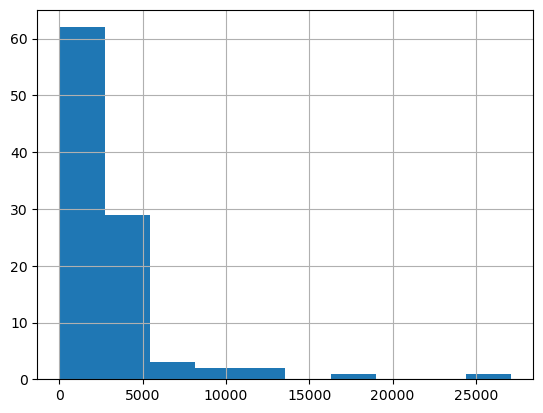

In [140]:
# Now lets try to plot again using MatplotLib

data_import['MEDIA POSTED'].hist()

##### Not bad. Lets try the Plotly version

In [141]:
# Plotly Version (Interactive)
fig = px.histogram(data_import, x='MEDIA POSTED')

# Give the bars a black outline each
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.show()

In [142]:
# Check the Histogram visuals with the actual table dataset

data_import.sort_values('MEDIA POSTED', ascending=False)

RANK                BRAND   CATEGORIES 1   CATEGORIES 2  FOLLOWERS  \
73    74            snoopdogg    celebrities      musicians   14000000   
45    46                  NBA          sport     basketball   20100000   
12    13  National Geographic          media          media   65800000   
30    31                 9gag  entertainment  entertainment   35000000   
24    25         FC Barcelona          sport       football   43300000   
..   ...                  ...            ...            ...        ...   
14    15            Leo Messi    celebrities       athletes   61900000   
48    49          Luis Suarez    celebrities       athletes   18700000   
93    94      Louis Tomlinson    celebrities      musicians   11800000   
83    84    Robert Downey Jr.    celebrities             tv   12900000   
43    44          Emma Watson    celebrities         actors   21400000   

              ER iPOSTS ON HASHTAG  MEDIA POSTED  
73  0.46% (4159)       859k  (530)         27100  
45  1.13% (3211)        8.7M  (73)         17800  
12  1.14% (3184)       5.3M  (123)         12700  
30  2.42% (1525)       1.5M  (341)         11400  
24  1.78% (2271)       2.9M  (212)          8900  
..           ...               ...           ...  
14   4.27% (481)       5.1M  (134)           180  
48  2.50% (1453)     10.5k  (2939)           176  
93   11.42% (32)       25.5M  (23)           148  
83   3.65% (693)     818.1k  (544)           133  
43   7.29% (107)         1M  (466)            40  

[100 rows x 8 columns]

#

### Does Number of posts has a correlation to the followers? Let's Find out

In [143]:
import plotly.graph_objects as go

# Create a scatter plot
fig = go.Figure(data=go.Scatter(
    x=data_import['MEDIA POSTED'],
    y=data_import['FOLLOWERS'],
    mode='markers'
))

# Set plot layout
fig.update_layout(
    title='Correlation between FOLLOWERS and MEDIA POSTED',
    xaxis_title='MEDIA POSTED',
    yaxis_title= 'FOLLOWERS'
)

# Show the plot
fig.show()

##### As you can see from the scatter plot, there isn't a correlation between Number of media posts and followers. Few of the highest followers count actually has one of the fewer media posts

#

### Lets find out the Engagement Rate for each of the profile. This is to check how many % of the followers actually Like & Comment on a post

In [144]:
# Start by checking the table again

data_import

RANK                   BRAND CATEGORIES 1 CATEGORIES 2  FOLLOWERS  \
0      1            Selena Gomez  celebrities    musicians  105400000   
1      2            Taylor Swift  celebrities    musicians   95200000   
2      3           Ariana Grande  celebrities    musicians   92300000   
3      4                 Beyonce  celebrities    musicians   90600000   
4      5     Kim Kardashian West  celebrities           tv   89300000   
..   ...                     ...          ...          ...        ...   
95    96  DanialvesD2 My Twitter  celebrities     athletes   11700000   
96    97         Dolce & Gabbana      fashion       luxury   11700000   
97    98           Tyga / T-Raww  celebrities    musicians   11600000   
98    99       Paul Labile Pogba  celebrities     athletes   11500000   
99   100            Barack Obama  celebrities    political   11500000   

              ER iPOSTS ON HASHTAG  MEDIA POSTED  
0   2.62% (1342)       14.5M  (48)          1200  
1   1.96% (2040)       10.5M  (66)           958  
2   1.43% (2759)       16.9M  (41)          2800  
3   2.53% (1427)        9.2M  (70)          1400  
4   1.39% (2812)       5.1M  (130)          3600  
..           ...               ...           ...  
95  1.62% (2477)    122.4k  (1486)          1700  
96  0.48% (4142)       6.1M  (105)          3900  
97  1.31% (2922)       1.2M  (421)          2500  
98   6.11% (170)     77.6k  (1745)           396  
99   3.37% (826)       2.5M  (240)           231  

[100 rows x 8 columns]

In [145]:
# Remove the bracketed value from 'ER' column
data_import['ER'] = data_import['ER'].str.replace(r'\s*\([^()]*\)', '', regex=True)

# Replace '%' with an empty string and divide by 100
data_import['ER'] = pd.to_numeric(data_import['ER'].str.replace('%', '', regex=False))  / 100

# Convert the 'ER' column to float
data_import['ER'] = data_import['ER'].astype(float)

In [146]:
# Check updated data types

data_import.dtypes

RANK                   int64
BRAND                 object
CATEGORIES 1          object
CATEGORIES 2          object
FOLLOWERS              int32
ER                   float64
iPOSTS ON HASHTAG     object
MEDIA POSTED           int32
dtype: object

<AxesSubplot:>

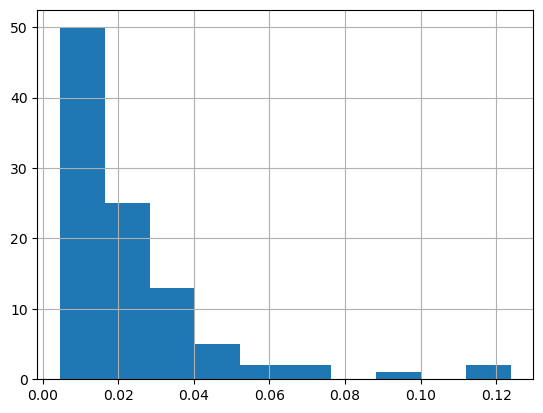

In [155]:
# Create a bar chart using Matplotlib
data_import['ER'].hist()


In [148]:
# Plotly Version (Interactive)
fig = px.histogram(data_import, x='ER')

# Give the bars a black outline each
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.show()

##### Majority of the profiles has an ER ranging from 1% to 2%. Which means only these % of the followers actually Like & Comment on their posts

#

### Is there a correlation between Number of followers and Engagement Rate?

In [156]:
# Create a scatter plot
fig = go.Figure(data=go.Scatter(
    x=data_import['FOLLOWERS'],
    y=data_import['ER'],
    mode='markers'
))

# Set plot layout
fig.update_layout(
    title='Correlation of ER and FOLLOWERS',
    xaxis_title='FOLLOWERS',
    yaxis_title='ER'
)

# Show the plot
fig.show()

##### From the graph, there isn't any correlation of between no. of followers and Engagement Rate.

##

### Let's find out which category appears the most within the Top 100 Instagram Profiles

In [150]:
# What are the different categories?
data_import['CATEGORIES 2'].unique()

array(['musicians', 'tv', 'athletes', 'models', 'sport', 'media',
       'fashion', 'actors', 'football', 'entertainment', 'basketball',
       'other', 'retail', 'luxury', 'entrepreneurs', 'beverages',
       'beauty', 'political'], dtype=object)

In [158]:
# Let's print out the count of each category
data_import['CATEGORIES 2'].value_counts()

musicians        30
athletes         18
actors           11
tv                7
models            5
luxury            5
media             4
sport             4
retail            3
football          3
fashion           3
entertainment     1
entrepreneurs     1
beverages         1
beauty            1
other             1
basketball        1
political         1
Name: CATEGORIES 2, dtype: int64

##### As you can see, Most of the Top 100 profiles belong to the musicians category. 

##


# END OF EDA